# 1. 전처리 진행

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 불러오기
raw = pd.read_csv('../../final_프젝_데이터/서울시_침수흔적도.csv',encoding='utf-8-sig')
raw2 = pd.read_csv('../../final_프젝_데이터/등고선수치.csv',encoding='utf-8-sig')
raw3 = pd.read_csv('../../final_프젝_데이터/서울시_경사.csv',encoding='utf-8-sig')
raw4 = pd.read_csv('../../final_프젝_데이터/서울시_연속지적도.csv',encoding='utf-8-sig')
raw5 = pd.read_csv('../../final_프젝_데이터/하천거리.csv',encoding='utf-8-sig')
raw6 = pd.read_csv('../../final_프젝_데이터/하천면적.csv',encoding='utf-8-sig')

In [4]:
df = raw.copy()
df2 = raw2.copy()
df3 = raw3.copy()
df4 = raw4.copy()
df5 = raw5.copy()
df6 = raw6.copy()

In [5]:
df.head()

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,행정코드,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,침수지역정보,지오메트리
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,..."
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,주택,"POLYGON ((956590.6408143371 1963700.11134354, ..."
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,2022,주택,"POLYGON ((956383.2795007367 1963392.863235048,..."
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.0,1156010400,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,2022,상가,"POLYGON ((947842.214000747 1946702.945905377, ..."
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.0,1130510100,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,2022,주택,"POLYGON ((958804.352649358 1958357.276617252, ..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       9724 non-null   object 
 1   침수수심      9724 non-null   float64
 2   침수원인      9724 non-null   object 
 3   침수평균해발고도  9724 non-null   float64
 4   침수면적      9724 non-null   float64
 5   행정코드      9724 non-null   int64  
 6   침수시작날짜    9724 non-null   int64  
 7   침수종료날짜    9724 non-null   object 
 8   침수시작시간    9724 non-null   int64  
 9   침수종료시간    9724 non-null   int64  
 10  침수내용      9724 non-null   object 
 11  주소        9724 non-null   object 
 12  침수연도      9724 non-null   int64  
 13  침수지역정보    8668 non-null   object 
 14  지오메트리     9724 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 1.1+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13704 entries, 0 to 13703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UFID       13704 non-null  object 
 1   구분코드       13704 non-null  object 
 2   등고수치       13704 non-null  float64
 3   통합코드       13704 non-null  object 
 4   제작정보       13704 non-null  object 
 5   둘레_측정값(m)  13704 non-null  float64
dtypes: float64(2), object(4)
memory usage: 642.5+ KB


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899756 entries, 0 to 899755
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   법정동명     899756 non-null  object
 1   지번       899551 non-null  object
 2   기준년월     899756 non-null  object
 3   지형높이코드   899756 non-null  int64 
 4   지형높이     899756 non-null  object
 5   공시지가     899756 non-null  int64 
 6   데이터기준일자  899756 non-null  object
 7   구단위      899756 non-null  object
dtypes: int64(2), object(6)
memory usage: 54.9+ MB


In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903481 entries, 0 to 903480
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   필지고유번호   903481 non-null  int64 
 1   지번       903481 non-null  object
 2   승인여부     903481 non-null  object
 3   원천도형ID   903481 non-null  int64 
 4   원천시군구코드  903481 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 34.5+ MB


In [10]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정동     426 non-null    object 
 1   구단위     426 non-null    object 
 2   하천_거리   426 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.1+ KB


In [11]:
df2.head()

,UFID,구분코드,등고수치,통합코드,제작정보,둘레_측정값(m)
0,1000037709008F00110000000000097632,주곡선,490.0,(볼록지)주곡선,2015001,753.868258
1,1000037709008F00110000000000097633,주곡선,480.0,(볼록지)주곡선,2015001,3409.613338
2,1000037709008F00110000000000097635,주곡선,465.0,(볼록지)주곡선,2015001,3875.317653
3,1000037709008F00110000000000097636,계곡선,475.0,(볼록지)계곡선,2015001,3571.586296
4,1000037709018F00110000000000097643,주곡선,470.0,(볼록지)주곡선,2015001,4500.693987


In [12]:
df3.head()

,법정동명,지번,기준년월,지형높이코드,지형높이,공시지가,데이터기준일자,구단위
0,서울특별시 종로구 청운동,1,2023-01,3,완경사,5320000,2024-01-23,종로구
1,서울특별시 종로구 청운동,1-1,2023-01,0,지정되지않음,1567000,2024-01-23,종로구
2,서울특별시 종로구 청운동,1-2,2023-01,4,급경사,2355000,2024-01-23,종로구
3,서울특별시 종로구 청운동,1-3,2023-01,3,완경사,5104000,2024-01-23,종로구
4,서울특별시 종로구 청운동,1-4,2023-01,0,지정되지않음,1828000,2024-01-23,종로구


In [13]:
df4.head()

,필지고유번호,지번,승인여부,원천도형ID,원천시군구코드
0,1111011000100770013,77-13대,1,161542,11110
1,1111011000100770014,77-14대,1,161543,11110
2,1111017400105950099,595-99 대,1,161544,11110
3,1111017400105950247,595-247 대,1,161545,11110
4,1111011000100020001,2-1대,1,161547,11110


In [14]:
df5.head()

,행정동,구단위,하천_거리
0,서울특별시 종로구 사직동,종로구,1177.805114
1,서울특별시 종로구 삼청동,종로구,2572.845770
2,서울특별시 종로구 부암동,종로구,487.130331
3,서울특별시 종로구 평창동,종로구,945.846607
4,서울특별시 종로구 무악동,종로구,2422.030461


In [15]:
df6.head()

,행정동,구단위,행정동_총_면적(km),행정동_하천면적(km),하천면적비율
0,서울특별시 종로구 사직동,종로구,1.859083,0.000000,0.000000
1,서울특별시 종로구 삼청동,종로구,2.171915,0.000000,0.000000
2,서울특별시 종로구 부암동,종로구,3.513782,0.023106,0.006576
3,서울특별시 종로구 평창동,종로구,14.395302,0.050816,0.003530
4,서울특별시 종로구 무악동,종로구,0.745724,0.000000,0.000000


In [16]:
print(df2.info())
print('-'*100)
print(df3.info())
print('-'*100)
print(df4.info())
print('-'*100)
print(df5.info())
print('-'*100)
print(df6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13704 entries, 0 to 13703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UFID       13704 non-null  object 
 1   구분코드       13704 non-null  object 
 2   등고수치       13704 non-null  float64
 3   통합코드       13704 non-null  object 
 4   제작정보       13704 non-null  object 
 5   둘레_측정값(m)  13704 non-null  float64
dtypes: float64(2), object(4)
memory usage: 642.5+ KB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899756 entries, 0 to 899755
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   법정동명     899756 non-null  object
 1   지번       899551 non-null  object
 2   기준년월     899756 non-null  object
 3   지형높이코드   899756 non-null  int64 
 4   지형높이     899756 non-null  object
 5   공시지가     899756 non-null  int64

In [17]:
df.describe()

,침수수심,침수평균해발고도,침수면적,행정코드,침수시작날짜,침수시작시간,침수종료시간,침수연도
count,9724.000000,9724.000000,9724.000000,9.724000e+03,9.724000e+03,9724.000000,9724.000000,9724.000000
mean,0.387828,21.063774,608.447735,1.155174e+09,2.021489e+07,13.608700,20.078568,2021.593069
std,0.209284,22.549690,2900.942130,1.068064e+07,1.832921e+05,8.125837,7.954268,1.197755
min,0.010000,3.370000,0.210000,1.111010e+09,2.180828e+06,0.000000,0.000000,2016.000000
25%,0.300000,12.300000,103.182500,1.154510e+09,2.022081e+07,1.000000,23.000000,2022.000000
50%,0.300000,16.300000,149.000000,1.156013e+09,2.022081e+07,18.000000,24.000000,2022.000000
75%,0.500000,23.860000,275.000000,1.162010e+09,2.022081e+07,20.000000,24.000000,2022.000000
max,1.800000,1341.660000,113020.000000,1.234568e+09,2.022123e+07,24.000000,24.000000,2022.000000


In [18]:
# 각 데이터 컬럼 통일화 (구단위로 통일)
df.rename(columns={'자치구':'구단위'}, inplace=True)

In [19]:
df.head()

,구단위,침수수심,침수원인,침수평균해발고도,침수면적,행정코드,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,침수지역정보,지오메트리
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,..."
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,주택,"POLYGON ((956590.6408143371 1963700.11134354, ..."
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,2022,주택,"POLYGON ((956383.2795007367 1963392.863235048,..."
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.0,1156010400,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,2022,상가,"POLYGON ((947842.214000747 1946702.945905377, ..."
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.0,1130510100,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,2022,주택,"POLYGON ((958804.352649358 1958357.276617252, ..."


In [20]:
# df3 필요없는 컬럼 정리
df3.head()
# 기준년월, 공시지가, 데이터기준일자 필요없음

,법정동명,지번,기준년월,지형높이코드,지형높이,공시지가,데이터기준일자,구단위
0,서울특별시 종로구 청운동,1,2023-01,3,완경사,5320000,2024-01-23,종로구
1,서울특별시 종로구 청운동,1-1,2023-01,0,지정되지않음,1567000,2024-01-23,종로구
2,서울특별시 종로구 청운동,1-2,2023-01,4,급경사,2355000,2024-01-23,종로구
3,서울특별시 종로구 청운동,1-3,2023-01,3,완경사,5104000,2024-01-23,종로구
4,서울특별시 종로구 청운동,1-4,2023-01,0,지정되지않음,1828000,2024-01-23,종로구


In [21]:
# df3 유지할 컬럼 리스트
keep_columns = [
    '법정동명', '지형높이코드',
    '지형높이', '구단위'
]

# 데이터프레임에서 유지할 컬럼만 선택
df3 = df3[keep_columns]

In [22]:
# 결과 확인
df3.head()

,법정동명,지형높이코드,지형높이,구단위
0,서울특별시 종로구 청운동,3,완경사,종로구
1,서울특별시 종로구 청운동,0,지정되지않음,종로구
2,서울특별시 종로구 청운동,4,급경사,종로구
3,서울특별시 종로구 청운동,3,완경사,종로구
4,서울특별시 종로구 청운동,0,지정되지않음,종로구


In [23]:
# 컬럼 위치 변경 함수
def move_column(df, col_name, new_index):
    cols = list(df.columns)
    cols.insert(new_index, cols.pop(cols.index(col_name)))
    return df[cols]

df3 = move_column(df3, '구단위', 0)

In [24]:
df3.head()

,구단위,법정동명,지형높이코드,지형높이
0,종로구,서울특별시 종로구 청운동,3,완경사
1,종로구,서울특별시 종로구 청운동,0,지정되지않음
2,종로구,서울특별시 종로구 청운동,4,급경사
3,종로구,서울특별시 종로구 청운동,3,완경사
4,종로구,서울특별시 종로구 청운동,0,지정되지않음


In [25]:
df.head()

,구단위,침수수심,침수원인,침수평균해발고도,침수면적,행정코드,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,침수지역정보,지오메트리
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,..."
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,주택,"POLYGON ((956590.6408143371 1963700.11134354, ..."
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,2022,주택,"POLYGON ((956383.2795007367 1963392.863235048,..."
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.0,1156010400,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,2022,상가,"POLYGON ((947842.214000747 1946702.945905377, ..."
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.0,1130510100,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,2022,주택,"POLYGON ((958804.352649358 1958357.276617252, ..."


In [26]:
# df 유지할 컬럼 리스트
keep_columns = [
    '구단위', '침수수심', '침수원인',
    '침수평균해발고도', '침수면적', 
    '침수시작날짜', '침수종료날짜', 
    '침수시작시간', '침수종료시간',
    '침수내용', '주소', 
    '행정코드', 
    '침수연도', '침수지역정보',
    '지오메트리'
]

# 데이터프레임에서 유지할 컬럼만 선택
df = df[keep_columns]

In [27]:
df.head()

,구단위,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,행정코드,침수연도,침수지역정보,지오메트리
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,..."
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,1130510400,2022,주택,"POLYGON ((956590.6408143371 1963700.11134354, ..."
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,1130510400,2022,주택,"POLYGON ((956383.2795007367 1963392.863235048,..."
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.0,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,1156010400,2022,상가,"POLYGON ((947842.214000747 1946702.945905377, ..."
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,1130510100,2022,주택,"POLYGON ((958804.352649358 1958357.276617252, ..."


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구단위       9724 non-null   object 
 1   침수수심      9724 non-null   float64
 2   침수원인      9724 non-null   object 
 3   침수평균해발고도  9724 non-null   float64
 4   침수면적      9724 non-null   float64
 5   침수시작날짜    9724 non-null   int64  
 6   침수종료날짜    9724 non-null   object 
 7   침수시작시간    9724 non-null   int64  
 8   침수종료시간    9724 non-null   int64  
 9   침수내용      9724 non-null   object 
 10  주소        9724 non-null   object 
 11  행정코드      9724 non-null   int64  
 12  침수연도      9724 non-null   int64  
 13  침수지역정보    8668 non-null   object 
 14  지오메트리     9724 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 1.1+ MB


In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899756 entries, 0 to 899755
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구단위     899756 non-null  object
 1   법정동명    899756 non-null  object
 2   지형높이코드  899756 non-null  int64 
 3   지형높이    899756 non-null  object
dtypes: int64(1), object(3)
memory usage: 27.5+ MB


In [30]:
df3.head()

,구단위,법정동명,지형높이코드,지형높이
0,종로구,서울특별시 종로구 청운동,3,완경사
1,종로구,서울특별시 종로구 청운동,0,지정되지않음
2,종로구,서울특별시 종로구 청운동,4,급경사
3,종로구,서울특별시 종로구 청운동,3,완경사
4,종로구,서울특별시 종로구 청운동,0,지정되지않음


In [31]:
# txt 파일 불러오기
file_path = '../../final_프젝_데이터/법정동코드 전체자료.txt'

In [32]:
# 파일 읽기
with open(file_path, 'r', encoding='euc-kr') as file:
    lines = file.readlines()

In [33]:
# 딕셔너리 생성
seoul_districts = {}

In [34]:
# 전처리
for line in lines:
    parts = line.strip().split('\t')
    if len(parts) == 3 and parts[2] == '존재' and '서울특별시' in parts[1] and parts[1] != '서울특별시':
        seoul_districts[parts[1]] = int(parts[0])

In [35]:
# df3에 행정코드 추가
df3['행정코드'] = df3['법정동명'].map(seoul_districts)

In [36]:
# NaN 값이 있는지 확인
nan_rows = df3[df3['행정코드'].isna()]
print("NaN 값이 있는 행정동명:")
print(nan_rows['법정동명'].unique())

NaN 값이 있는 행정동명:
['서울특별시 강동구 명일동 ' '서울특별시 강동구 고덕동 ' '서울특별시 강동구 상일동 ' '서울특별시 강동구 길동 '
 '서울특별시 강동구 둔촌동 ' '서울특별시 강동구 암사동 ' '서울특별시 강동구 성내동 ' '서울특별시 강동구 천호동 '
 '서울특별시 강동구 강일동 ']


In [37]:
# NaN 값인 행정동명 수동으로 추가 
manual_additions = {
    '서울특별시 강동구 명일동 ':'1174010100', 
    '서울특별시 강동구 고덕동 ':'1174010200',
    '서울특별시 강동구 상일동 ':'1174010300',
    '서울특별시 강동구 길동 ':'1174010500',
 '서울특별시 강동구 둔촌동 ':'1174010600',
 '서울특별시 강동구 암사동 ':'1174010700',
 '서울특별시 강동구 성내동 ':'1174010800',
 '서울특별시 강동구 천호동 ':'1174010900',
 '서울특별시 강동구 강일동 ':'1174010900'
}

In [38]:
# 수동으로 추가한 값을 딕셔너리에 반영
seoul_districts.update(manual_additions)

In [39]:
# 다시 행정코드 매핑
df3['행정코드'] = df3['법정동명'].map(seoul_districts)

In [40]:
# NaN 값이 있는지 확인
nan_rows = df3[df3['행정코드'].isna()]
print("NaN 값이 있는 행정동명:")
print(nan_rows['법정동명'].unique())

NaN 값이 있는 행정동명:
[]


In [41]:
# 행정코드 타입을 int로 변환 (NaN 값이 없을 경우에만)
nan_rows = df3[df3['행정코드'].isna()]
if nan_rows.empty:
    df3['행정코드'] = df3['행정코드'].astype(int)

In [42]:
print(df.info())
print('-'*100)
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구단위       9724 non-null   object 
 1   침수수심      9724 non-null   float64
 2   침수원인      9724 non-null   object 
 3   침수평균해발고도  9724 non-null   float64
 4   침수면적      9724 non-null   float64
 5   침수시작날짜    9724 non-null   int64  
 6   침수종료날짜    9724 non-null   object 
 7   침수시작시간    9724 non-null   int64  
 8   침수종료시간    9724 non-null   int64  
 9   침수내용      9724 non-null   object 
 10  주소        9724 non-null   object 
 11  행정코드      9724 non-null   int64  
 12  침수연도      9724 non-null   int64  
 13  침수지역정보    8668 non-null   object 
 14  지오메트리     9724 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 1.1+ MB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899756 entri

In [43]:
# df와 df3 병합
merged_df = pd.merge(df, df3, on='행정코드', how='left')

In [44]:
# 결과 확인
merged_df.head()

,구단위_x,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,행정코드,침수연도,침수지역정보,지오메트리,구단위_y,법정동명,지형높이코드,지형높이
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,...",강북구,서울특별시 강북구 우이동,2.0,평지
1,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,...",강북구,서울특별시 강북구 우이동,2.0,평지
2,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,...",강북구,서울특별시 강북구 우이동,2.0,평지
3,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,...",강북구,서울특별시 강북구 우이동,2.0,평지
4,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,...",강북구,서울특별시 강북구 우이동,2.0,평지


In [45]:
# '구단위_x' 컬럼을 남기고 '구단위_y' 컬럼 제거
merged_df.drop(columns=['구단위_y'], inplace=True)

# '구단위_x' 컬럼 이름을 '구단위'로 변경
merged_df.rename(columns={'구단위_x': '구단위'}, inplace=True)

In [46]:
# 결과 확인
merged_df.head()

,구단위,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,행정코드,침수연도,침수지역정보,지오메트리,법정동명,지형높이코드,지형높이
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,...",서울특별시 강북구 우이동,2.0,평지
1,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,...",서울특별시 강북구 우이동,2.0,평지
2,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,...",서울특별시 강북구 우이동,2.0,평지
3,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,...",서울특별시 강북구 우이동,2.0,평지
4,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,...",서울특별시 강북구 우이동,2.0,평지


In [47]:
# df5.to_csv('하천거리수정.csv',encoding='utf-8-sig')

In [48]:
# df5에 행정코드 추가
# df5['행정코드'] = df5['행정동'].map(seoul_districts)

In [49]:
# 결과 확인
df5.head()

,행정동,구단위,하천_거리
0,서울특별시 종로구 사직동,종로구,1177.805114
1,서울특별시 종로구 삼청동,종로구,2572.845770
2,서울특별시 종로구 부암동,종로구,487.130331
3,서울특별시 종로구 평창동,종로구,945.846607
4,서울특별시 종로구 무악동,종로구,2422.030461


In [50]:
# '행정코드' 열을 기준으로 병합
df5 = pd.merge(df5, df6, on='행정동', how='inner')

In [51]:
# 행정동명과 법정동명 파일 경로 설정
# mapping_file_path = '../../final_프젝_데이터/KIKmix.20240801.csv'

In [52]:
# 행정동과 법정동 매핑 파일 읽기
# mapping_df = pd.read_csv(mapping_file_path, encoding='utf-8')

In [53]:
# 서울특별시에 해당하는 데이터만 남기기
# seoul_mapping_df = mapping_df[mapping_df['시도명'] == '서울특별시']

In [54]:
# # 행정동명 및 법정동명 생성
# seoul_mapping_df['행정동명'] = seoul_mapping_df['시도명'] + ' ' + seoul_mapping_df['시군구명'] + ' ' + seoul_mapping_df['읍면동명']
# seoul_mapping_df['법정동명'] = seoul_mapping_df['시도명'] + ' ' + seoul_mapping_df['시군구명'] + ' ' + seoul_mapping_df['동리명']

In [55]:
# seoul_mapping_df.info()

In [56]:
# seoul_mapping_df.to_csv('서울시행정동법정동코드종합.csv',encoding='utf-8-sig')

In [57]:
# 행정동명과 법정동명 파일 경로 설정
mapping_file_path = '../../final_프젝_데이터/서울시행정동법정동코드종합.csv'

In [58]:
# 수정된 매핑 파일 읽기
mapping_df = pd.read_csv(mapping_file_path, encoding='utf-8-sig')

In [59]:
# 행정동명과 법정동코드를 사용해 딕셔너리 생성
admin_to_code_mapping = pd.Series(mapping_df['법정동코드'].values, index=mapping_df['행정동명']).to_dict()

In [60]:
admin_to_code_mapping

{'서울특별시': 1100000000,
 '서울특별시 종로구': 1111000000,
 '서울특별시 종로구 청운효자동': 1111011900,
 '서울특별시 종로구 사직동': 1111012100,
 '서울특별시 종로구 삼청동': 1111014500,
 '서울특별시 종로구 부암동': 1111018600,
 '서울특별시 종로구 평창동': 1111018300,
 '서울특별시 종로구 무악동': 1111018700,
 '서울특별시 종로구 교남동': 1111018100,
 '서울특별시 종로구 가회동': 1111014900,
 '서울특별시 종로구 종로1.2.3.4가동': 1111016100,
 '서울특별시 종로구 종로5.6가동': 1111016700,
 '서울특별시 종로구 이화동': 1111016800,
 '서울특별시 종로구 혜화동': 1111017300,
 '서울특별시 종로구 창신제1동': 1111017400,
 '서울특별시 종로구 창신제2동': 1111017400,
 '서울특별시 종로구 창신제3동': 1111017400,
 '서울특별시 종로구 숭인제1동': 1111017500,
 '서울특별시 종로구 숭인제2동': 1111017500,
 '서울특별시 중구': 1114000000,
 '서울특별시 중구 소공동': 1114017000,
 '서울특별시 중구 회현동': 1114016800,
 '서울특별시 중구 명동': 1114014200,
 '서울특별시 중구 필동': 1114015800,
 '서울특별시 중구 장충동': 1114014400,
 '서울특별시 중구 광희동': 1114015400,
 '서울특별시 중구 을지로동': 1114016100,
 '서울특별시 중구 신당동': 1114016400,
 '서울특별시 중구 다산동': 1114016200,
 '서울특별시 중구 약수동': 1114016200,
 '서울특별시 중구 청구동': 1114016200,
 '서울특별시 중구 신당제5동': 1114016200,
 '서울특별시 중구 동화동': 1114016200,
 '서울특별시 중구 황학동'

In [61]:
# # df5에서 행정동명을 법정동명으로 변환
df5['행정코드'] = df5['행정동'].map(admin_to_code_mapping)

In [62]:
# # NaN 값이 있는지 확인
nan_rows = df5[df5['행정코드'].isna()]
nan_admin_names = nan_rows['행정동'].unique()
print("NaN 값이 있는 행정동:")
print(nan_admin_names)

NaN 값이 있는 행정동:
['서울특별시 종로구 종로1·2·3·4가동' '서울특별시 종로구 종로5·6가동' '서울특별시 종로구 창신1동'
 '서울특별시 종로구 창신2동' '서울특별시 종로구 창신3동' '서울특별시 종로구 숭인1동' '서울특별시 종로구 숭인2동'
 '서울특별시 중구 신당5동' '서울특별시 용산구 원효로2동' '서울특별시 용산구 이촌1동' '서울특별시 용산구 이촌2동'
 '서울특별시 용산구 이태원1동' '서울특별시 용산구 이태원2동' '서울특별시 용산구 원효로1동' '서울특별시 성동구 왕십리2동'
 '서울특별시 성동구 행당1동' '서울특별시 성동구 행당2동' '서울특별시 성동구 성수1가1동' '서울특별시 성동구 성수1가2동'
 '서울특별시 성동구 성수2가1동' '서울특별시 성동구 성수2가3동' '서울특별시 성동구 금호2·3가동'
 '서울특별시 광진구 중곡1동' '서울특별시 광진구 중곡2동' '서울특별시 광진구 중곡3동' '서울특별시 광진구 중곡4동'
 '서울특별시 광진구 구의1동' '서울특별시 광진구 구의2동' '서울특별시 광진구 구의3동' '서울특별시 광진구 자양1동'
 '서울특별시 광진구 자양2동' '서울특별시 광진구 자양3동' '서울특별시 광진구 자양4동' '서울특별시 동대문구 휘경1동'
 '서울특별시 동대문구 휘경2동' '서울특별시 동대문구 전농1동' '서울특별시 동대문구 전농2동' '서울특별시 동대문구 답십리2동'
 '서울특별시 동대문구 장안1동' '서울특별시 동대문구 장안2동' '서울특별시 동대문구 이문1동' '서울특별시 동대문구 이문2동'
 '서울특별시 동대문구 답십리1동' '서울특별시 중랑구 면목2동' '서울특별시 중랑구 면목4동' '서울특별시 중랑구 면목5동'
 '서울특별시 중랑구 면목7동' '서울특별시 중랑구 상봉1동' '서울특별시 중랑구 상봉2동' '서울특별시 중랑구 중화1동'
 '서울특별시 중랑구 중화2동' '서울특별시 중랑구 묵1동' '서울특별시 중랑구 묵2동' '서울특별시 중랑구 망우3동'
 '서울특별시 중랑구 면목3·8동

In [63]:
df5

,행정동,구단위_x,하천_거리,구단위_y,행정동_총_면적(km),행정동_하천면적(km),하천면적비율,행정코드
0,서울특별시 종로구 사직동,종로구,1177.805114,종로구,1.859083,0.000000,0.000000,1.111012e+09
1,서울특별시 종로구 삼청동,종로구,2572.845770,종로구,2.171915,0.000000,0.000000,1.111014e+09
2,서울특별시 종로구 부암동,종로구,487.130331,종로구,3.513782,0.023106,0.006576,1.111019e+09
3,서울특별시 종로구 평창동,종로구,945.846607,종로구,14.395302,0.050816,0.003530,1.111018e+09
4,서울특별시 종로구 무악동,종로구,2422.030461,종로구,0.745724,0.000000,0.000000,1.111019e+09
...,...,...,...,...,...,...,...,...
421,서울특별시 강동구 암사1동,강동구,1949.210044,강동구,1.163787,0.000000,0.000000,NaN
422,서울특별시 강동구 천호2동,강동구,975.435841,강동구,2.913768,0.735509,0.252425,NaN
423,서울특별시 강동구 길동,강동구,2444.320684,강동구,2.550985,0.000000,0.000000,1.174010e+09
424,서울특별시 구로구 오류2동,구로구,1043.430815,구로구,4.901979,0.050677,0.010338,NaN


In [64]:

admin_to_legal_mapping = {
    '서울특별시 종로구 종로1·2·3·4가동': '서울특별시 종로구 청진동',
    '서울특별시 종로구 종로5·6가동': '서울특별시 종로구 효제동',
    '서울특별시 종로구 창신1동': '서울특별시 종로구 창신동',
    '서울특별시 종로구 창신2동': '서울특별시 종로구 창신동',
    '서울특별시 종로구 창신3동': '서울특별시 종로구 창신동',
    '서울특별시 종로구 숭인1동': '서울특별시 종로구 숭인동',
    '서울특별시 종로구 숭인2동': '서울특별시 종로구 숭인동',
    '서울특별시 중구 신당5동': '서울특별시 중구 신당동',
    '서울특별시 용산구 원효로2동': '서울특별시 용산구 원효로동',
    '서울특별시 용산구 이촌1동': '서울특별시 용산구 이촌동',
    '서울특별시 용산구 이촌2동': '서울특별시 용산구 이촌동',
    '서울특별시 용산구 이태원1동': '서울특별시 용산구 이태원동',
    '서울특별시 용산구 이태원2동': '서울특별시 용산구 이태원동',
    '서울특별시 용산구 원효로1동': '서울특별시 용산구 원효로동',
    '서울특별시 성동구 왕십리2동': '서울특별시 성동구 왕십리동',
    '서울특별시 성동구 행당1동': '서울특별시 성동구 행당동',
    '서울특별시 성동구 행당2동': '서울특별시 성동구 행당동',
    '서울특별시 성동구 성수1가1동': '서울특별시 성동구 성수동1가',
    '서울특별시 성동구 성수1가2동': '서울특별시 성동구 성수동1가',
    '서울특별시 성동구 성수2가1동': '서울특별시 성동구 성수동2가',
    '서울특별시 성동구 성수2가3동': '서울특별시 성동구 성수동2가',
    '서울특별시 성동구 금호2·3가동': '서울특별시 성동구 금호동',
    '서울특별시 광진구 중곡1동': '서울특별시 광진구 중곡동',
    '서울특별시 광진구 중곡2동': '서울특별시 광진구 중곡동',
    '서울특별시 광진구 중곡3동': '서울특별시 광진구 중곡동',
    '서울특별시 광진구 중곡4동': '서울특별시 광진구 중곡동',
    '서울특별시 광진구 구의1동': '서울특별시 광진구 구의동',
    '서울특별시 광진구 구의2동': '서울특별시 광진구 구의동',
    '서울특별시 광진구 구의3동': '서울특별시 광진구 구의동',
    '서울특별시 광진구 자양1동': '서울특별시 광진구 자양동',
    '서울특별시 광진구 자양2동': '서울특별시 광진구 자양동',
    '서울특별시 광진구 자양3동': '서울특별시 광진구 자양동',
    '서울특별시 광진구 자양4동': '서울특별시 광진구 자양동',
    '서울특별시 동대문구 휘경1동': '서울특별시 동대문구 휘경동',
    '서울특별시 동대문구 휘경2동': '서울특별시 동대문구 휘경동',
    '서울특별시 동대문구 전농1동': '서울특별시 동대문구 전농동',
    '서울특별시 동대문구 전농2동': '서울특별시 동대문구 전농동',
    '서울특별시 동대문구 답십리2동': '서울특별시 동대문구 답십리동',
    '서울특별시 동대문구 장안1동': '서울특별시 동대문구 장안동',
    '서울특별시 동대문구 장안2동': '서울특별시 동대문구 장안동',
    '서울특별시 동대문구 이문1동': '서울특별시 동대문구 이문동',
    '서울특별시 동대문구 이문2동': '서울특별시 동대문구 이문동',
    '서울특별시 동대문구 답십리1동': '서울특별시 동대문구 답십리동',
    '서울특별시 중랑구 면목2동': '서울특별시 중랑구 면목동',
    '서울특별시 중랑구 면목4동': '서울특별시 중랑구 면목동',
    '서울특별시 중랑구 면목5동': '서울특별시 중랑구 면목동',
    '서울특별시 중랑구 면목7동': '서울특별시 중랑구 면목동',
    '서울특별시 중랑구 상봉1동': '서울특별시 중랑구 상봉동',
    '서울특별시 중랑구 상봉2동': '서울특별시 중랑구 상봉동',
    '서울특별시 중랑구 중화1동': '서울특별시 중랑구 중화동',
    '서울특별시 중랑구 중화2동': '서울특별시 중랑구 중화동',
    '서울특별시 중랑구 묵1동': '서울특별시 중랑구 묵동',
    '서울특별시 중랑구 묵2동': '서울특별시 중랑구 묵동',
    '서울특별시 중랑구 망우3동': '서울특별시 중랑구 망우동',
    '서울특별시 중랑구 면목3·8동': '서울특별시 중랑구 면목동',
    '서울특별시 성북구 돈암1동': '서울특별시 성북구 돈암동',
    '서울특별시 성북구 돈암2동': '서울특별시 성북구 돈암동',
    '서울특별시 성북구 정릉1동': '서울특별시 성북구 정릉동',
    '서울특별시 성북구 정릉2동': '서울특별시 성북구 정릉동',
    '서울특별시 성북구 정릉3동': '서울특별시 성북구 정릉동',
    '서울특별시 성북구 정릉4동': '서울특별시 성북구 정릉동',
    '서울특별시 성북구 길음1동': '서울특별시 성북구 길음동',
    '서울특별시 성북구 길음2동': '서울특별시 성북구 길음동',
    '서울특별시 성북구 월곡1동': '서울특별시 성북구 월곡동',
    '서울특별시 성북구 월곡2동': '서울특별시 성북구 월곡동',
    '서울특별시 성북구 장위1동': '서울특별시 성북구 장위동',
    '서울특별시 성북구 장위2동': '서울특별시 성북구 장위동',
    '서울특별시 성북구 장위3동': '서울특별시 성북구 장위동',
    '서울특별시 도봉구 쌍문1동': '서울특별시 도봉구 쌍문동',
    '서울특별시 도봉구 쌍문2동': '서울특별시 도봉구 쌍문동',
    '서울특별시 도봉구 쌍문3동': '서울특별시 도봉구 쌍문동',
    '서울특별시 도봉구 쌍문4동': '서울특별시 도봉구 쌍문동',
    '서울특별시 도봉구 방학1동': '서울특별시 도봉구 방학동',
    '서울특별시 도봉구 방학2동': '서울특별시 도봉구 방학동',
    '서울특별시 도봉구 방학3동': '서울특별시 도봉구 방학동',
    '서울특별시 도봉구 창1동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창2동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창3동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창4동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창5동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 도봉1동': '서울특별시 도봉구 도봉동',
    '서울특별시 도봉구 도봉2동': '서울특별시 도봉구 도봉동',
    '서울특별시 노원구 상계3·4동': '서울특별시 노원구 상계동',
    '서울특별시 노원구 상계6·7동': '서울특별시 노원구 상계동',
    '서울특별시 노원구 중계2·3동': '서울특별시 노원구 중계동',
    '서울특별시 은평구 불광1동': '서울특별시 은평구 불광동',
    '서울특별시 은평구 갈현1동': '서울특별시 은평구 갈현동',
    '서울특별시 은평구 갈현2동': '서울특별시 은평구 갈현동',
    '서울특별시 은평구 응암1동': '서울특별시 은평구 응암동',
    '서울특별시 은평구 응암2동': '서울특별시 은평구 응암동',
    '서울특별시 은평구 신사1동': '서울특별시 은평구 신사동',
    '서울특별시 은평구 신사2동': '서울특별시 은평구 신사동',
    '서울특별시 은평구 불광2동': '서울특별시 은평구 불광동',
    '서울특별시 은평구 응암3동': '서울특별시 은평구 응암동',
    '서울특별시 서대문구 홍제1동': '서울특별시 서대문구 홍제동',
    '서울특별시 서대문구 홍제3동': '서울특별시 서대문구 홍제동',
    '서울특별시 서대문구 홍제2동': '서울특별시 서대문구 홍제동',
    '서울특별시 서대문구 홍은1동': '서울특별시 서대문구 홍은동',
    '서울특별시 서대문구 홍은2동': '서울특별시 서대문구 홍은동',
    '서울특별시 서대문구 남가좌1동': '서울특별시 서대문구 남가좌동',
    '서울특별시 서대문구 남가좌2동': '서울특별시 서대문구 남가좌동',
    '서울특별시 서대문구 북가좌1동': '서울특별시 서대문구 북가좌동',
    '서울특별시 서대문구 북가좌2동': '서울특별시 서대문구 북가좌동',
    '서울특별시 마포구 망원1동': '서울특별시 마포구 망원동',
    '서울특별시 마포구 망원2동': '서울특별시 마포구 망원동',
    '서울특별시 마포구 성산1동': '서울특별시 마포구 성산동',
    '서울특별시 마포구 성산2동': '서울특별시 마포구 성산동',
    '서울특별시 강서구 등촌1동': '서울특별시 강서구 등촌동',
    '서울특별시 강서구 등촌2동': '서울특별시 강서구 등촌동',
    '서울특별시 강서구 등촌3동': '서울특별시 강서구 등촌동',
    '서울특별시 강서구 화곡2동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡3동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡4동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡6동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡8동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 가양1동': '서울특별시 강서구 가양동',
    '서울특별시 강서구 가양2동': '서울특별시 강서구 가양동',
    '서울특별시 강서구 가양3동': '서울특별시 강서구 가양동',
    '서울특별시 강서구 발산1동': '서울특별시 강서구 발산동',
    '서울특별시 강서구 방화1동': '서울특별시 강서구 방화동',
    '서울특별시 강서구 방화2동': '서울특별시 강서구 방화동',
    '서울특별시 강서구 방화3동': '서울특별시 강서구 방화동',
    '서울특별시 강서구 화곡1동': '서울특별시 강서구 화곡동',
    '서울특별시 구로구 구로1동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 구로3동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 구로4동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 구로5동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 고척1동': '서울특별시 구로구 고척동',
    '서울특별시 구로구 고척2동': '서울특별시 구로구 고척동',
    '서울특별시 구로구 개봉2동': '서울특별시 구로구 개봉동',
    '서울특별시 구로구 개봉3동': '서울특별시 구로구 개봉동',
    '서울특별시 구로구 오류1동': '서울특별시 구로구 오류동',
    '서울특별시 구로구 구로2동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 개봉1동': '서울특별시 구로구 개봉동',
    '서울특별시 금천구 독산1동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 독산2동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 독산3동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 독산4동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 시흥1동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥2동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥3동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥4동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥5동': '서울특별시 금천구 시흥동',
    '서울특별시 영등포구 당산1동': '서울특별시 영등포구 당산동',
    '서울특별시 영등포구 당산2동': '서울특별시 영등포구 당산동',
    '서울특별시 영등포구 양평1동': '서울특별시 영등포구 양평동',
    '서울특별시 영등포구 양평2동': '서울특별시 영등포구 양평동',
    '서울특별시 영등포구 신길1동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길3동': '서울특별시 영등포구 신길동',
    '서울특별시 도봉구 방학1동': '서울특별시 도봉구 방학동',
    '서울특별시 도봉구 방학2동': '서울특별시 도봉구 방학동',
    '서울특별시 도봉구 방학3동': '서울특별시 도봉구 방학동',
    '서울특별시 도봉구 창1동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창2동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창3동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창4동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창5동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 도봉1동': '서울특별시 도봉구 도봉동',
    '서울특별시 도봉구 도봉2동': '서울특별시 도봉구 도봉동',
    '서울특별시 노원구 상계3·4동': '서울특별시 노원구 상계동',
    '서울특별시 노원구 상계6·7동': '서울특별시 노원구 상계동',
    '서울특별시 노원구 중계2·3동': '서울특별시 노원구 중계동',
    '서울특별시 은평구 불광1동': '서울특별시 은평구 불광동',
    '서울특별시 은평구 갈현1동': '서울특별시 은평구 갈현동',
    '서울특별시 은평구 갈현2동': '서울특별시 은평구 갈현동',
    '서울특별시 은평구 응암1동': '서울특별시 은평구 응암동',
    '서울특별시 은평구 응암2동': '서울특별시 은평구 응암동',
    '서울특별시 은평구 신사1동': '서울특별시 은평구 신사동',
    '서울특별시 은평구 신사2동': '서울특별시 은평구 신사동',
    '서울특별시 은평구 불광2동': '서울특별시 은평구 불광동',
    '서울특별시 은평구 응암3동': '서울특별시 은평구 응암동',
    '서울특별시 서대문구 홍제1동': '서울특별시 서대문구 홍제동',
    '서울특별시 서대문구 홍제3동': '서울특별시 서대문구 홍제동',
    '서울특별시 서대문구 홍제2동': '서울특별시 서대문구 홍제동',
    '서울특별시 서대문구 홍은1동': '서울특별시 서대문구 홍은동',
    '서울특별시 서대문구 홍은2동': '서울특별시 서대문구 홍은동',
    '서울특별시 서대문구 남가좌1동': '서울특별시 서대문구 남가좌동',
    '서울특별시 서대문구 남가좌2동': '서울특별시 서대문구 남가좌동',
    '서울특별시 서대문구 북가좌1동': '서울특별시 서대문구 북가좌동',
    '서울특별시 서대문구 북가좌2동': '서울특별시 서대문구 북가좌동',
    '서울특별시 마포구 망원1동': '서울특별시 마포구 망원동',
    '서울특별시 마포구 망원2동': '서울특별시 마포구 망원동',
    '서울특별시 마포구 성산1동': '서울특별시 마포구 성산동',
    '서울특별시 마포구 성산2동': '서울특별시 마포구 성산동',
    '서울특별시 강서구 등촌1동': '서울특별시 강서구 등촌동',
    '서울특별시 강서구 등촌2동': '서울특별시 강서구 등촌동',
    '서울특별시 강서구 등촌3동': '서울특별시 강서구 등촌동',
    '서울특별시 강서구 화곡2동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡3동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡4동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡6동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡8동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 가양1동': '서울특별시 강서구 가양동',
    '서울특별시 강서구 가양2동': '서울특별시 강서구 가양동',
    '서울특별시 강서구 가양3동': '서울특별시 강서구 가양동',
    '서울특별시 강서구 발산1동': '서울특별시 강서구 발산동',
    '서울특별시 강서구 방화1동': '서울특별시 강서구 방화동',
    '서울특별시 강서구 방화2동': '서울특별시 강서구 방화동',
    '서울특별시 강서구 방화3동': '서울특별시 강서구 방화동',
    '서울특별시 강서구 화곡1동': '서울특별시 강서구 화곡동',
    '서울특별시 구로구 구로1동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 구로3동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 구로4동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 구로5동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 고척1동': '서울특별시 구로구 고척동',
    '서울특별시 구로구 고척2동': '서울특별시 구로구 고척동',
    '서울특별시 구로구 개봉2동': '서울특별시 구로구 개봉동',
    '서울특별시 구로구 개봉3동': '서울특별시 구로구 개봉동',
    '서울특별시 구로구 오류1동': '서울특별시 구로구 오류동',
    '서울특별시 구로구 구로2동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 개봉1동': '서울특별시 구로구 개봉동',
    '서울특별시 금천구 독산1동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 독산2동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 독산3동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 독산4동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 시흥1동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥2동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥3동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥4동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥5동': '서울특별시 금천구 시흥동',
    '서울특별시 영등포구 당산1동': '서울특별시 영등포구 당산동',
    '서울특별시 영등포구 당산2동': '서울특별시 영등포구 당산동',
    '서울특별시 영등포구 양평1동': '서울특별시 영등포구 양평동',
    '서울특별시 영등포구 양평2동': '서울특별시 영등포구 양평동',
    '서울특별시 영등포구 신길1동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길3동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길3동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길4동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길5동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길6동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길7동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 대림1동': '서울특별시 영등포구 대림동',
    '서울특별시 영등포구 대림2동': '서울특별시 영등포구 대림동',
    '서울특별시 영등포구 대림3동': '서울특별시 영등포구 대림동',
    '서울특별시 동작구 노량진2동': '서울특별시 동작구 노량진동',
    '서울특별시 동작구 상도1동': '서울특별시 동작구 상도동',
    '서울특별시 동작구 상도2동': '서울특별시 동작구 상도동',
    '서울특별시 동작구 상도3동': '서울특별시 동작구 상도동',
    '서울특별시 동작구 상도4동': '서울특별시 동작구 상도동',
    '서울특별시 동작구 사당1동': '서울특별시 동작구 사당동',
    '서울특별시 동작구 사당3동': '서울특별시 동작구 사당동',
    '서울특별시 동작구 사당4동': '서울특별시 동작구 사당동',
    '서울특별시 동작구 사당5동': '서울특별시 동작구 사당동',
    '서울특별시 동작구 신대방1동': '서울특별시 동작구 신대방동',
    '서울특별시 동작구 신대방2동': '서울특별시 동작구 신대방동',
    '서울특별시 동작구 노량진1동': '서울특별시 동작구 노량진동',
    '서울특별시 동작구 사당2동': '서울특별시 동작구 사당동',
    '서울특별시 강동구 명일1동': '서울특별시 강동구 명일동',
    '서울특별시 강동구 명일2동': '서울특별시 강동구 명일동',
    '서울특별시 강동구 고덕1동': '서울특별시 강동구 고덕동',
    '서울특별시 강동구 고덕2동': '서울특별시 강동구 고덕동',
    '서울특별시 강동구 암사2동': '서울특별시 강동구 암사동',
    '서울특별시 강동구 암사3동': '서울특별시 강동구 암사동',
    '서울특별시 강동구 천호1동': '서울특별시 강동구 천호동',
    '서울특별시 강동구 천호3동': '서울특별시 강동구 천호동',
    '서울특별시 강동구 성내1동': '서울특별시 강동구 성내동',
    '서울특별시 강동구 성내2동': '서울특별시 강동구 성내동',
    '서울특별시 강동구 성내3동': '서울특별시 강동구 성내동',
    '서울특별시 강동구 둔촌1동': '서울특별시 강동구 둔촌동',
    '서울특별시 강동구 둔촌2동': '서울특별시 강동구 둔촌동',
    '서울특별시 강동구 암사1동': '서울특별시 강동구 암사동',
    '서울특별시 강동구 천호2동': '서울특별시 강동구 천호동',
    '서울특별시 구로구 오류2동': '서울특별시 구로구 오류동'
}


In [65]:
df5

,행정동,구단위_x,하천_거리,구단위_y,행정동_총_면적(km),행정동_하천면적(km),하천면적비율,행정코드
0,서울특별시 종로구 사직동,종로구,1177.805114,종로구,1.859083,0.000000,0.000000,1.111012e+09
1,서울특별시 종로구 삼청동,종로구,2572.845770,종로구,2.171915,0.000000,0.000000,1.111014e+09
2,서울특별시 종로구 부암동,종로구,487.130331,종로구,3.513782,0.023106,0.006576,1.111019e+09
3,서울특별시 종로구 평창동,종로구,945.846607,종로구,14.395302,0.050816,0.003530,1.111018e+09
4,서울특별시 종로구 무악동,종로구,2422.030461,종로구,0.745724,0.000000,0.000000,1.111019e+09
...,...,...,...,...,...,...,...,...
421,서울특별시 강동구 암사1동,강동구,1949.210044,강동구,1.163787,0.000000,0.000000,NaN
422,서울특별시 강동구 천호2동,강동구,975.435841,강동구,2.913768,0.735509,0.252425,NaN
423,서울특별시 강동구 길동,강동구,2444.320684,강동구,2.550985,0.000000,0.000000,1.174010e+09
424,서울특별시 구로구 오류2동,구로구,1043.430815,구로구,4.901979,0.050677,0.010338,NaN


In [66]:
# NaN 값이 있는 '행정동' 열을 대체
df5['행정동'] = df5['행정동'].map(admin_to_legal_mapping).fillna(df5['행정동'])

In [67]:
df5

,행정동,구단위_x,하천_거리,구단위_y,행정동_총_면적(km),행정동_하천면적(km),하천면적비율,행정코드
0,서울특별시 종로구 사직동,종로구,1177.805114,종로구,1.859083,0.000000,0.000000,1.111012e+09
1,서울특별시 종로구 삼청동,종로구,2572.845770,종로구,2.171915,0.000000,0.000000,1.111014e+09
2,서울특별시 종로구 부암동,종로구,487.130331,종로구,3.513782,0.023106,0.006576,1.111019e+09
3,서울특별시 종로구 평창동,종로구,945.846607,종로구,14.395302,0.050816,0.003530,1.111018e+09
4,서울특별시 종로구 무악동,종로구,2422.030461,종로구,0.745724,0.000000,0.000000,1.111019e+09
...,...,...,...,...,...,...,...,...
421,서울특별시 강동구 암사동,강동구,1949.210044,강동구,1.163787,0.000000,0.000000,NaN
422,서울특별시 강동구 천호동,강동구,975.435841,강동구,2.913768,0.735509,0.252425,NaN
423,서울특별시 강동구 길동,강동구,2444.320684,강동구,2.550985,0.000000,0.000000,1.174010e+09
424,서울특별시 구로구 오류동,구로구,1043.430815,구로구,4.901979,0.050677,0.010338,NaN


In [68]:
# # NaN 값이 있는지 확인
nan_rows = df5[df5['행정코드'].isna()]
nan_admin_names = nan_rows['행정동'].unique()
print("NaN 값이 있는 행정동:")
print(nan_admin_names)

NaN 값이 있는 행정동:
['서울특별시 종로구 청진동' '서울특별시 종로구 효제동' '서울특별시 종로구 창신동' '서울특별시 종로구 숭인동'
 '서울특별시 중구 신당동' '서울특별시 용산구 원효로동' '서울특별시 용산구 이촌동' '서울특별시 용산구 이태원동'
 '서울특별시 성동구 왕십리동' '서울특별시 성동구 행당동' '서울특별시 성동구 성수동1가' '서울특별시 성동구 성수동2가'
 '서울특별시 성동구 금호동' '서울특별시 광진구 중곡동' '서울특별시 광진구 구의동' '서울특별시 광진구 자양동'
 '서울특별시 동대문구 휘경동' '서울특별시 동대문구 전농동' '서울특별시 동대문구 답십리동' '서울특별시 동대문구 장안동'
 '서울특별시 동대문구 이문동' '서울특별시 중랑구 면목동' '서울특별시 중랑구 상봉동' '서울특별시 중랑구 중화동'
 '서울특별시 중랑구 묵동' '서울특별시 중랑구 망우동' '서울특별시 성북구 돈암동' '서울특별시 성북구 정릉동'
 '서울특별시 성북구 길음동' '서울특별시 성북구 월곡동' '서울특별시 성북구 장위동' '서울특별시 도봉구 쌍문동'
 '서울특별시 도봉구 방학동' '서울특별시 도봉구 창동' '서울특별시 도봉구 도봉동' '서울특별시 노원구 상계동'
 '서울특별시 노원구 중계동' '서울특별시 은평구 불광동' '서울특별시 은평구 갈현동' '서울특별시 은평구 응암동'
 '서울특별시 은평구 신사동' '서울특별시 서대문구 홍제동' '서울특별시 서대문구 홍은동' '서울특별시 서대문구 남가좌동'
 '서울특별시 서대문구 북가좌동' '서울특별시 마포구 망원동' '서울특별시 마포구 성산동' '서울특별시 강서구 등촌동'
 '서울특별시 강서구 화곡동' '서울특별시 강서구 가양동' '서울특별시 강서구 발산동' '서울특별시 강서구 방화동'
 '서울특별시 구로구 구로동' '서울특별시 구로구 고척동' '서울특별시 구로구 개봉동' '서울특별시 구로구 오류동'
 '서울특별시 금천구 독산동' '서울특별시 금천구 시흥동' '서울특별시 영등포구 당산동' '서울특별시 영등

In [69]:
# df5에서 행정동명을 법정동명으로 변환
df5['행정코드'] = df5['행정동'].map(admin_to_code_mapping)

In [70]:
seoul_districts

{'서울특별시 종로구': 1111000000,
 '서울특별시 종로구 청운동': 1111010100,
 '서울특별시 종로구 신교동': 1111010200,
 '서울특별시 종로구 궁정동': 1111010300,
 '서울특별시 종로구 효자동': 1111010400,
 '서울특별시 종로구 창성동': 1111010500,
 '서울특별시 종로구 통의동': 1111010600,
 '서울특별시 종로구 적선동': 1111010700,
 '서울특별시 종로구 통인동': 1111010800,
 '서울특별시 종로구 누상동': 1111010900,
 '서울특별시 종로구 누하동': 1111011000,
 '서울특별시 종로구 옥인동': 1111011100,
 '서울특별시 종로구 체부동': 1111011200,
 '서울특별시 종로구 필운동': 1111011300,
 '서울특별시 종로구 내자동': 1111011400,
 '서울특별시 종로구 사직동': 1111011500,
 '서울특별시 종로구 도렴동': 1111011600,
 '서울특별시 종로구 당주동': 1111011700,
 '서울특별시 종로구 내수동': 1111011800,
 '서울특별시 종로구 세종로': 1111011900,
 '서울특별시 종로구 신문로1가': 1111012000,
 '서울특별시 종로구 신문로2가': 1111012100,
 '서울특별시 종로구 청진동': 1111012200,
 '서울특별시 종로구 서린동': 1111012300,
 '서울특별시 종로구 수송동': 1111012400,
 '서울특별시 종로구 중학동': 1111012500,
 '서울특별시 종로구 종로1가': 1111012600,
 '서울특별시 종로구 공평동': 1111012700,
 '서울특별시 종로구 관훈동': 1111012800,
 '서울특별시 종로구 견지동': 1111012900,
 '서울특별시 종로구 와룡동': 1111013000,
 '서울특별시 종로구 권농동': 1111013100,
 '서울특별시 종로구 운니동': 1111013200,
 '서울특별시 종

In [71]:
# 수동으로 추가한 값을 딕셔너리에 반영
admin_to_code_mapping.update(seoul_districts)

In [72]:
# df5에서 행정동명을 법정동명으로 변환
df5['행정코드'] = df5['행정동'].map(admin_to_code_mapping)

In [73]:
# # NaN 값이 있는지 확인
nan_rows = df5[df5['행정코드'].isna()]
nan_admin_names = nan_rows['행정동'].unique()
print("NaN 값이 있는 행정동:")
print(nan_admin_names)

NaN 값이 있는 행정동:
['서울특별시 용산구 원효로동' '서울특별시 성동구 왕십리동' '서울특별시 성동구 금호동' '서울특별시 성북구 월곡동'
 '서울특별시 강서구 발산동']


In [74]:
# # NaN 값인 행정동명 수동으로 추가 
manual_additions_02 = {
    '서울특별시 용산구 원효로동':'1117011800', 
    '서울특별시 성동구 왕십리동':'1120010100',
    '서울특별시 성동구 금호동':'1120011200',
    '서울특별시 성북구 월곡동':'1129013700',
    '서울특별시 강서구 발산동':'1150010700'
}

In [75]:
# 수동으로 추가한 값을 딕셔너리에 반영
admin_to_code_mapping.update(manual_additions_02)

In [76]:
# df5에서 행정동명을 법정동명으로 변환
df5['행정코드'] = df5['행정동'].map(admin_to_code_mapping)

In [77]:
# # NaN 값이 있는지 확인
nan_rows = df5[df5['행정코드'].isna()]
nan_admin_names = nan_rows['행정동'].unique()
print("NaN 값이 있는 행정동:")
print(nan_admin_names)

NaN 값이 있는 행정동:
[]


In [78]:
df5

,행정동,구단위_x,하천_거리,구단위_y,행정동_총_면적(km),행정동_하천면적(km),하천면적비율,행정코드
0,서울특별시 종로구 사직동,종로구,1177.805114,종로구,1.859083,0.000000,0.000000,1111011500
1,서울특별시 종로구 삼청동,종로구,2572.845770,종로구,2.171915,0.000000,0.000000,1111014000
2,서울특별시 종로구 부암동,종로구,487.130331,종로구,3.513782,0.023106,0.006576,1111018400
3,서울특별시 종로구 평창동,종로구,945.846607,종로구,14.395302,0.050816,0.003530,1111018300
4,서울특별시 종로구 무악동,종로구,2422.030461,종로구,0.745724,0.000000,0.000000,1111018700
...,...,...,...,...,...,...,...,...
421,서울특별시 강동구 암사동,강동구,1949.210044,강동구,1.163787,0.000000,0.000000,1174010700
422,서울특별시 강동구 천호동,강동구,975.435841,강동구,2.913768,0.735509,0.252425,1174010900
423,서울특별시 강동구 길동,강동구,2444.320684,강동구,2.550985,0.000000,0.000000,1174010500
424,서울특별시 구로구 오류동,구로구,1043.430815,구로구,4.901979,0.050677,0.010338,1153010800


In [79]:
# '구단위_x' 컬럼을 남기고 '구단위_y' 컬럼 제거
df5.drop(columns=['구단위_y'], inplace=True)

# '구단위_x' 컬럼 이름을 '구단위'로 변경
df5.rename(columns={'구단위_x': '구단위'}, inplace=True)

In [80]:
# df5에서 '행정동'과 '구단위' 컬럼 제거
df5_reduced = df5.drop(columns=['행정동', '구단위'])

In [81]:
# '행정코드' 열을 기준으로 병합
merged_df_river = pd.merge(df5_reduced, df, on='행정코드', how='inner')

In [82]:
merged_df_river.head()

,하천_거리,행정동_총_면적(km),행정동_하천면적(km),하천면적비율,행정코드,구단위,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,침수지역정보,지오메트리
0,487.130331,3.513782,0.023106,0.006576,1111018400,종로구,0.1,2022년 8.8 ~17. 호우,110.20,267.16,20220808,20220817,17,22,내수침수,서울특별시 종로구 자하문로38길 33 지하1층 (부암동),2022,주택,"POLYGON ((952798.4100328014 1955123.951944171,..."
1,487.130331,3.513782,0.023106,0.006576,1111018400,종로구,0.1,2022년 8.8 ~17. 호우,108.90,91.10,20220808,20220817,17,22,내수침수,서울특별시 종로구 창의문로 144 지상1층 (부암동),2022,주택,"POLYGON ((952734.5112162631 1954970.599488226,..."
2,945.846607,14.395302,0.050816,0.003530,1111018300,종로구,0.1,2022년 9.3~7. 제11호 태풍 힌남노,277.29,635.51,20220903,20220907,17,22,내수침수,서울특별시 종로구 평창7길 89,2022,주택,"POLYGON ((954106.505067203 1957512.793571447, ..."
3,473.782583,1.010158,0.015439,0.015284,1111016200,종로구,0.1,2022년 8.8 ~17. 호우,23.08,229.42,20220808,20220817,1,17,내수침수,서울특별시 종로구 종로39길 11 지하1층 (효제동),2022,주택,"POLYGON ((956378.0645058007 1952603.053665517,..."
4,346.830755,0.500446,0.018415,0.036796,1111017400,종로구,0.1,2022년 8.8 ~17. 호우,20.04,103.52,20220808,20220817,17,22,내수침수,서울특별시 종로구 종로44길 90-4 (창신동),2022,주택,"POLYGON ((957195.8475982471 1952470.137057787,..."


In [83]:
merged_df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41614 entries, 0 to 41613
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   하천_거리         41614 non-null  float64
 1   행정동_총_면적(km)  41614 non-null  float64
 2   행정동_하천면적(km)  41614 non-null  float64
 3   하천면적비율        41614 non-null  float64
 4   행정코드          41614 non-null  object 
 5   구단위           41614 non-null  object 
 6   침수수심          41614 non-null  float64
 7   침수원인          41614 non-null  object 
 8   침수평균해발고도      41614 non-null  float64
 9   침수면적          41614 non-null  float64
 10  침수시작날짜        41614 non-null  int64  
 11  침수종료날짜        41614 non-null  object 
 12  침수시작시간        41614 non-null  int64  
 13  침수종료시간        41614 non-null  int64  
 14  침수내용          41614 non-null  object 
 15  주소            41614 non-null  object 
 16  침수연도          41614 non-null  int64  
 17  침수지역정보        38380 non-null  object 
 18  지오메트리         41614 non-nu

In [84]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86917593 entries, 0 to 86917592
Data columns (total 18 columns):
 #   Column    Dtype  
---  ------    -----  
 0   구단위       object 
 1   침수수심      float64
 2   침수원인      object 
 3   침수평균해발고도  float64
 4   침수면적      float64
 5   침수시작날짜    int64  
 6   침수종료날짜    object 
 7   침수시작시간    int64  
 8   침수종료시간    int64  
 9   침수내용      object 
 10  주소        object 
 11  행정코드      int64  
 12  침수연도      int64  
 13  침수지역정보    object 
 14  지오메트리     object 
 15  법정동명      object 
 16  지형높이코드    float64
 17  지형높이      object 
dtypes: float64(4), int64(5), object(9)
memory usage: 11.7+ GB


# 2. EDA 분석

In [85]:
# 각 병합된 데이터 기초통계량
print(merged_df_river.describe())
print('-'*100)
print(merged_df.describe())

              하천_거리  행정동_총_면적(km)  행정동_하천면적(km)        하천면적비율          침수수심  \
count  41614.000000  41614.000000  41614.000000  41614.000000  41614.000000   
mean    1428.083755      1.766063      0.035990      0.012852      0.386109   
std      885.137101      2.024813      0.157868      0.039014      0.191470   
min       45.790914      0.351510      0.000000      0.000000      0.010000   
25%      506.541229      0.921072      0.000000      0.000000      0.300000   
50%     1384.776967      1.212734      0.000000      0.000000      0.300000   
75%     2148.167285      1.659527      0.015082      0.014559      0.500000   
max     3760.820482     20.886409      4.527430      0.603487      1.800000   

           침수평균해발고도           침수면적        침수시작날짜        침수시작시간        침수종료시간  \
count  41614.000000   41614.000000  4.161400e+04  41614.000000  41614.000000   
mean      22.083899     573.494977  2.021657e+07     11.864493     20.837194   
std       23.607330    2534.646122  1.534926e+05

In [86]:
# 결측치 확인
print(merged_df_river.isnull().sum())
print('-'*100)
print(merged_df.isnull().sum())

하천_거리              0
행정동_총_면적(km)       0
행정동_하천면적(km)       0
하천면적비율             0
행정코드               0
구단위                0
침수수심               0
침수원인               0
침수평균해발고도           0
침수면적               0
침수시작날짜             0
침수종료날짜             0
침수시작시간             0
침수종료시간             0
침수내용               0
주소                 0
침수연도               0
침수지역정보          3234
지오메트리              0
dtype: int64
----------------------------------------------------------------------------------------------------
구단위               0
침수수심              0
침수원인              0
침수평균해발고도          0
침수면적              0
침수시작날짜            0
침수종료날짜            0
침수시작시간            0
침수종료시간            0
침수내용              0
주소                0
행정코드              0
침수연도              0
침수지역정보      7123324
지오메트리             0
법정동명              4
지형높이코드            4
지형높이              4
dtype: int64


In [89]:
# 결측치가 있는 행 출력
nan_rows_river = merged_df_river[merged_df_river['침수지역정보'].isna()]

print("merged_df_river 결측치 행:")
nan_rows_river


merged_df_river 결측치 행:


,하천_거리,행정동_총_면적(km),행정동_하천면적(km),하천면적비율,행정코드,구단위,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,침수지역정보,지오메트리
29,1067.338374,0.503233,0.000000,0.000000,1114016200,중구,0.3,2016년 7.1~7호우·강풍·풍랑,78.44,149.0,20160701,20160707,11,17,침수,중구 신당동432-1648,2016,NaN,"POLYGON ((956356.3365690834 1950135.814505248,..."
35,567.473099,0.863111,0.014547,0.016854,1114016200,중구,0.3,2016년 7.1~7호우·강풍·풍랑,78.44,149.0,20160701,20160707,11,17,침수,중구 신당동432-1648,2016,NaN,"POLYGON ((956356.3365690834 1950135.814505248,..."
40,2106.179778,0.871357,0.000000,0.000000,1114016200,중구,0.3,2016년 7.1~7호우·강풍·풍랑,78.44,149.0,20160701,20160707,11,17,침수,중구 신당동432-1648,2016,NaN,"POLYGON ((956356.3365690834 1950135.814505248,..."
45,1985.620036,0.815868,0.000000,0.000000,1114016200,중구,0.3,2016년 7.1~7호우·강풍·풍랑,78.44,149.0,20160701,20160707,11,17,침수,중구 신당동432-1648,2016,NaN,"POLYGON ((956356.3365690834 1950135.814505248,..."
50,1817.787431,0.526118,0.000000,0.000000,1114016200,중구,0.3,2016년 7.1~7호우·강풍·풍랑,78.44,149.0,20160701,20160707,11,17,침수,중구 신당동432-1648,2016,NaN,"POLYGON ((956356.3365690834 1950135.814505248,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41609,2444.320684,2.550985,0.000000,0.000000,1174010500,강동구,0.5,2016년 7.1~7 호우·강풍·풍랑,18.33,95.3,20160701,20160707,5,11,내수침수,강동구 길동 413-21,2016,NaN,"POLYGON ((968030.7229873391 1948643.354503562,..."
41610,2444.320684,2.550985,0.000000,0.000000,1174010500,강동구,0.5,2016년 7.1~7 호우·강풍·풍랑,23.73,701.2,20160701,20160707,5,11,내수침수,강동구 길동 356-7,2016,NaN,"POLYGON ((968487.2579731115 1949016.750280412,..."
41611,45.790914,4.094868,0.391286,0.095555,1174011000,강동구,0.3,2018년 8.26~9.1 호우,20.38,330.0,20180826,20180901,15,21,내수침수,강동구 강일동 138-10,2018,NaN,"POLYGON ((970940.3434220499 1953120.276314976,..."
41612,45.790914,4.094868,0.391286,0.095555,1174011000,강동구,0.3,2017년 7.2 ~ 7.11 호우,20.38,330.0,20170702,20170711,19,1,내수침수,강동구 강일동 138-10,2017,NaN,"POLYGON ((970940.3434220499 1953120.276314976,..."


In [90]:
nan_rows = merged_df[merged_df['침수지역정보'].isna()]
print("merged_df 결측치 행:")
print(nan_rows)

merged_df 결측치 행:
          구단위  침수수심                  침수원인  침수평균해발고도    침수면적    침수시작날짜  \
79794269  강북구  0.45     2018년 8.26~9.1 호우     83.74  143.61  20180826   
79794270  강북구  0.45     2018년 8.26~9.1 호우     83.74  143.61  20180826   
79794271  강북구  0.45     2018년 8.26~9.1 호우     83.74  143.61  20180826   
79794272  강북구  0.45     2018년 8.26~9.1 호우     83.74  143.61  20180826   
79794273  강북구  0.45     2018년 8.26~9.1 호우     83.74  143.61  20180826   
...       ...   ...                   ...       ...     ...       ...   
86917588  서초구  0.50  2016년 7.1~7 호우·강풍·풍랑     18.47  281.90  20160701   
86917589  서초구  0.50  2016년 7.1~7 호우·강풍·풍랑     18.47  281.90  20160701   
86917590  서초구  0.50  2016년 7.1~7 호우·강풍·풍랑     18.47  281.90  20160701   
86917591  서초구  0.50  2016년 7.1~7 호우·강풍·풍랑     18.47  281.90  20160701   
86917592  서초구  0.50  2016년 7.1~7 호우·강풍·풍랑     18.47  281.90  20160701   

            침수종료날짜  침수시작시간  침수종료시간         침수내용              주소        행정코드  \
79794269  20180901      14 

In [91]:
# 침수지역정보 컬럼 제거
merged_df_river = merged_df_river.drop(columns=['침수지역정보'])
merged_df = merged_df.drop(columns=['침수지역정보'])

In [92]:
merged_df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41614 entries, 0 to 41613
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   하천_거리         41614 non-null  float64
 1   행정동_총_면적(km)  41614 non-null  float64
 2   행정동_하천면적(km)  41614 non-null  float64
 3   하천면적비율        41614 non-null  float64
 4   행정코드          41614 non-null  object 
 5   구단위           41614 non-null  object 
 6   침수수심          41614 non-null  float64
 7   침수원인          41614 non-null  object 
 8   침수평균해발고도      41614 non-null  float64
 9   침수면적          41614 non-null  float64
 10  침수시작날짜        41614 non-null  int64  
 11  침수종료날짜        41614 non-null  object 
 12  침수시작시간        41614 non-null  int64  
 13  침수종료시간        41614 non-null  int64  
 14  침수내용          41614 non-null  object 
 15  주소            41614 non-null  object 
 16  침수연도          41614 non-null  int64  
 17  지오메트리         41614 non-null  object 
dtypes: float64(7), int64(4), o

In [93]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86917593 entries, 0 to 86917592
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   구단위       object 
 1   침수수심      float64
 2   침수원인      object 
 3   침수평균해발고도  float64
 4   침수면적      float64
 5   침수시작날짜    int64  
 6   침수종료날짜    object 
 7   침수시작시간    int64  
 8   침수종료시간    int64  
 9   침수내용      object 
 10  주소        object 
 11  행정코드      int64  
 12  침수연도      int64  
 13  지오메트리     object 
 14  법정동명      object 
 15  지형높이코드    float64
 16  지형높이      object 
dtypes: float64(4), int64(5), object(8)
memory usage: 11.0+ GB


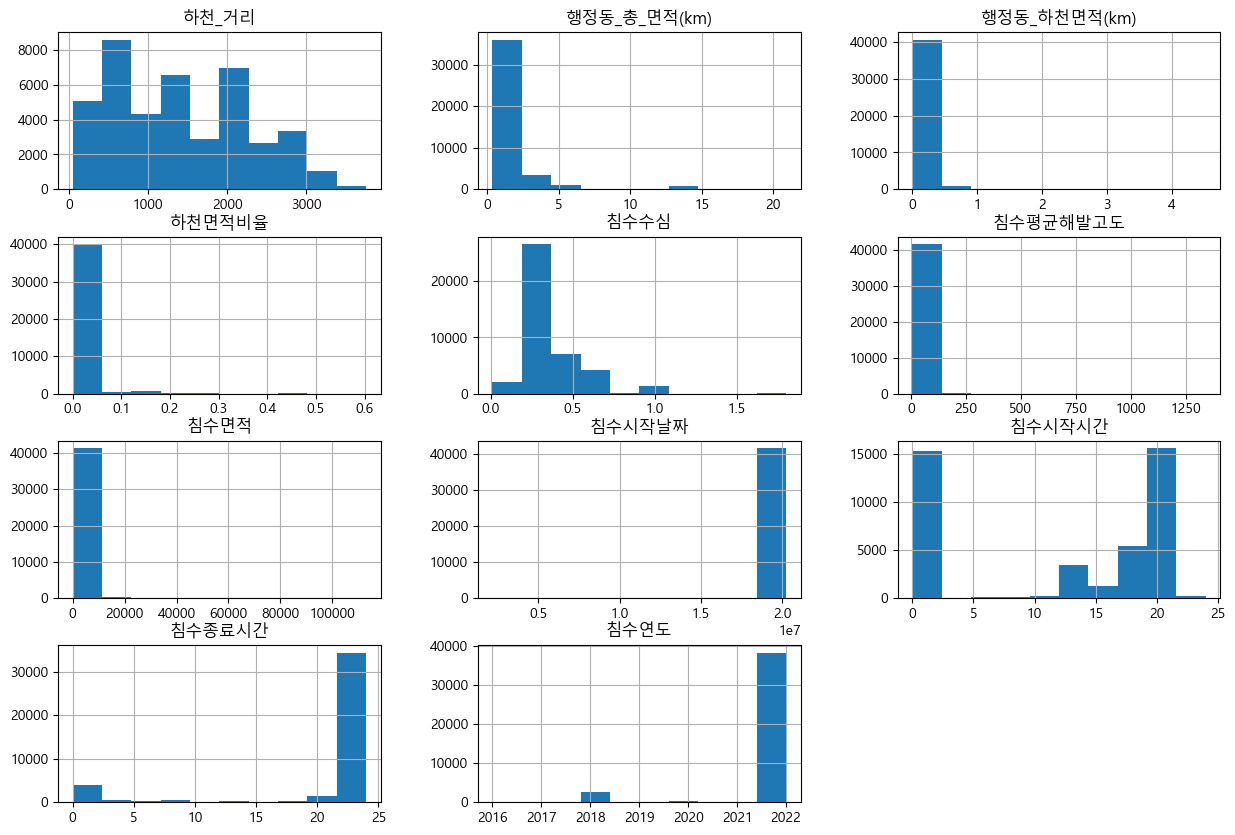

In [94]:
merged_df_river.hist(figsize=(15, 10))
plt.show()

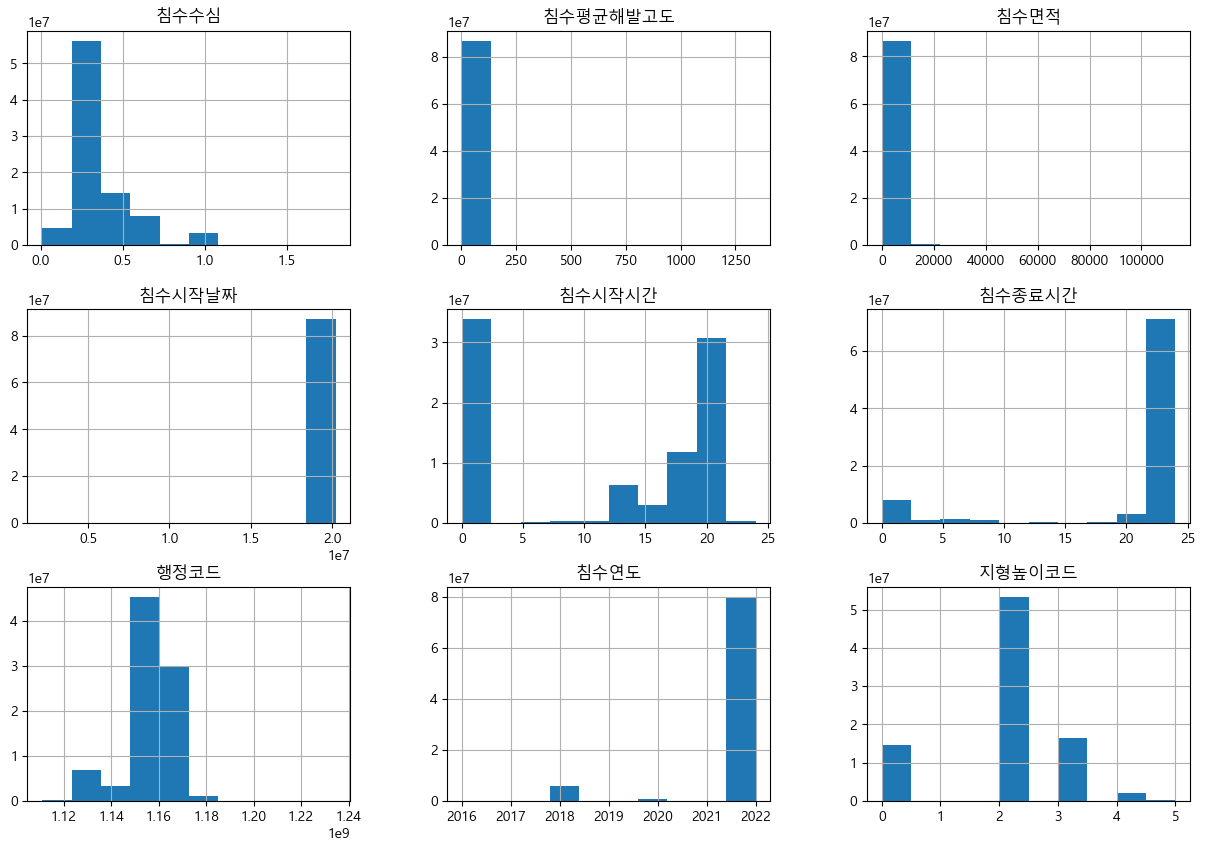

In [95]:
merged_df.hist(figsize=(15, 10))
plt.show()

In [96]:
# 자치구별 침수 발생 빈도 계산
gu_counts_river = merged_df_river['구단위'].value_counts()
gu_counts = merged_df['구단위'].value_counts()

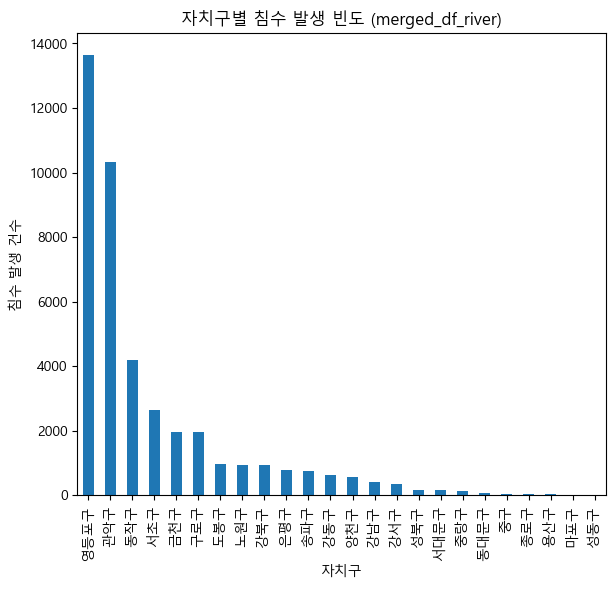

In [97]:
# 시각화
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
gu_counts_river.plot(kind='bar')
plt.title('자치구별 침수 발생 빈도 (merged_df_river)')
plt.xlabel('자치구')
plt.ylabel('침수 발생 건수')

plt.show()

In [98]:
# 영등포구 데이터 추출
yeongdeungpo_data = merged_df_river[merged_df_river['구단위'] == '영등포구']

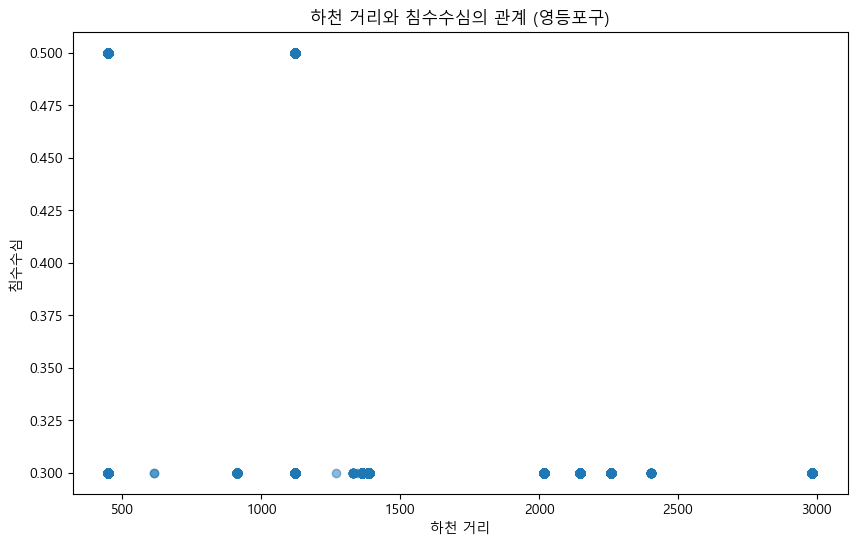

In [99]:
# 하천 거리와 침수 발생 빈도 간의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(yeongdeungpo_data['하천_거리'], yeongdeungpo_data['침수수심'], alpha=0.5)
plt.title('하천 거리와 침수수심의 관계 (영등포구)')
plt.xlabel('하천 거리')
plt.ylabel('침수수심')
plt.show()

In [100]:
# 하천 거리와 침수수심 간의 상관계수 계산
correlation = yeongdeungpo_data['하천_거리'].corr(yeongdeungpo_data['침수수심'])
print(f'하천 거리와 침수수심 간의 상관계수: {correlation}')

하천 거리와 침수수심 간의 상관계수: -0.44121717493131796


In [101]:
from scipy.stats import pearsonr

# 상관계수와 p-value 계산
correlation, p_value = pearsonr(yeongdeungpo_data['하천_거리'], yeongdeungpo_data['침수수심'])
print(f'상관계수: {correlation}, p-value: {p_value}')

상관계수: -0.44121717493133217, p-value: 0.0


구단위
강남구    -4.896177e-02
강동구    -1.418146e-01
강북구    -9.937852e-02
강서구    -7.327608e-01
관악구    -3.786532e-02
구로구    -1.509682e-01
금천구    -4.817790e-16
노원구              NaN
도봉구    -6.001269e-16
동대문구   -1.601584e-01
동작구    -8.970002e-02
마포구     1.691002e-01
서대문구    1.555318e-16
서초구     1.125783e-01
성동구              NaN
성북구    -4.527242e-16
송파구              NaN
양천구    -2.151191e-01
영등포구   -4.412172e-01
용산구    -9.172091e-17
은평구     1.324019e-16
종로구    -2.335581e-16
중구      1.628320e-02
중랑구     3.265070e-01
dtype: float64


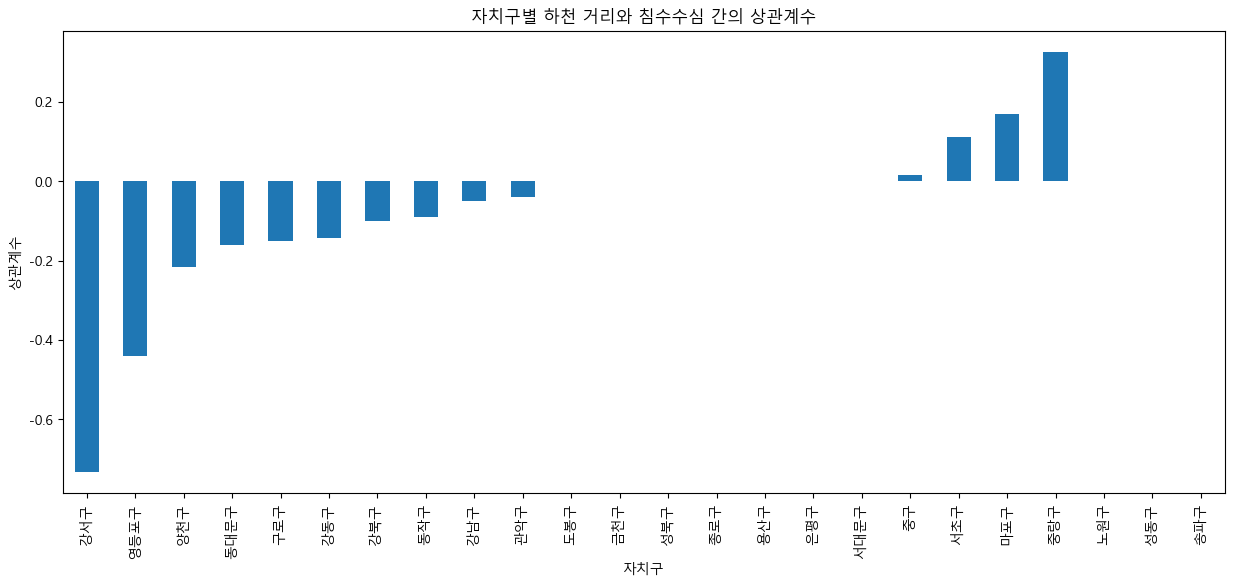

In [102]:
# 자치구별로 하천 거리와 침수수심 간의 상관계수를 계산
gu_corrs = merged_df_river.groupby('구단위').apply(lambda x: x['하천_거리'].corr(x['침수수심']))
print(gu_corrs)

# 자치구별 상관계수 시각화
plt.figure(figsize=(15, 6))
gu_corrs.sort_values().plot(kind='bar')
plt.title('자치구별 하천 거리와 침수수심 간의 상관계수')
plt.xlabel('자치구')
plt.ylabel('상관계수')
plt.show()

In [103]:
# 영등포구는 가장 많이 침수가 발생하는 지역이고 하천거리와에 상관관계도 높다.
# 반면 강서구는 하천 거리와에 상관계수가 높지만 침수가 적게 발생한다.

In [106]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.2/9.8 MB 7.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.8 MB 9.8 MB/s eta 0:00:01
   ----- ---------------------------------- 1.3/9.8 MB 10.5 MB/s eta 0:00:01
   ------- -------------------------------- 1.9/9.8 MB 10.8 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/9.8 MB 11.0 MB/s eta 0:00:01
   ----------- ---------------------------- 2.9/9.8 MB 11.0 MB/s eta 0:00:01
   -------------- ------------------------- 3.5/9.8 MB 11.1 MB/s eta 0:00:01
   ---------------- ----------------------- 4.0/9.8 MB 11.2 MB/s eta 0:00:01
   ------------------ --------------------- 4.6/9.8 MB 11.2 MB/s eta 0:00:01
   -------------------- ------------------- 5.1/9.8 MB 11.3 MB/s eta 0:00:01
   ---------------------- ----------------- 5.6/9.8 MB 11.2 MB/s eta 0:00:01
   ------------------------- -------------- 6.2/9.8 MB 11.3 MB/s eta 0:00:01
   ------

In [107]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 데이터 로드
# merged_df_river_clean 데이터프레임을 사용한다고 가정합니다.

# 독립 변수와 종속 변수 설정
X = merged_df_river[['침수평균해발고도', '하천_거리', '하천면적비율']]
y = merged_df_river['침수수심']

# 상수항 추가
X = sm.add_constant(X)

# 데이터 분할 (훈련/테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 학습
model = sm.OLS(y_train, X_train).fit()

# 모델 평가
y_pred = model.predict(X_test)
model_summary = model.summary()

print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   침수수심   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     389.8
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          6.98e-249
Time:                        16:51:47   Log-Likelihood:                 8448.4
No. Observations:               33291   AIC:                        -1.689e+04
Df Residuals:                   33287   BIC:                        -1.686e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3335      0.002    143.394      0.0

In [108]:
# 하천 거리와 침수수심 간의 상관계수 계산
correlation = yeongdeungpo_data['하천_거리'].corr(yeongdeungpo_data['침수평균해발고도'])
print(f'하천 거리와 침수평균해발고도 간의 상관계수: {correlation}')

하천 거리와 침수평균해발고도 간의 상관계수: 0.3369488072659026
